**Reading the file 50_Startups**

In [258]:
import pandas as pd

In [259]:
df = pd.read_csv('50_Startups.csv')
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


#### Basic Analysis

In [260]:
df.shape

(50, 5)

In [261]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [263]:
df.duplicated().sum()

0

In [264]:
# renaming the columns which have spaces in their names
df = df.rename(columns = {'R&D Spend':'R&D_Spend','Marketing Spend':'Marketing_Spend'})

In [265]:
# Statistical Summary
df.describe()

,R&D_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Visualising to understand the given data

<AxesSubplot:>

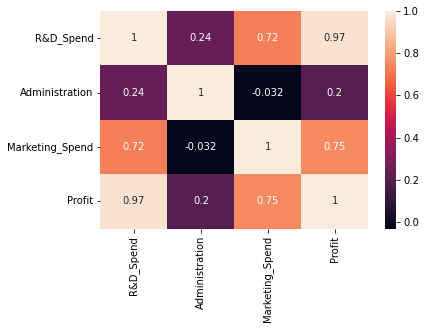

In [266]:
import seaborn as sns

sns. heatmap(df.corr(), annot = True)

In [267]:
df1 = pd.melt(df)

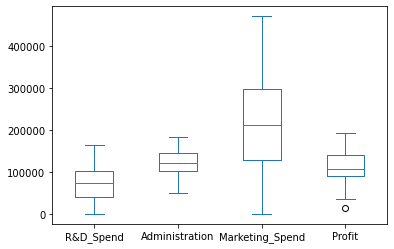

In [268]:
df.plot(kind = 'box');

In [269]:
# spliting the data frame to predictor and target

y = df['Profit']
X = df.drop('Profit', axis = 1)

In [270]:
X_Cat = X.select_dtypes(include = "object")
X_num = X.select_dtypes(exclude = "object")

In [271]:
X_num.head(3)

,R&D_Spend,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54


In [272]:
# using oneHotEncoder to feature engineer the categorical column
from sklearn.preprocessing import OneHotEncoder

In [273]:
ohe = OneHotEncoder()

In [274]:
ohe.fit(X_Cat)

OneHotEncoder()

In [275]:
ohe.transform(X_Cat).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [276]:
ohe.get_feature_names_out()

array(['State_California', 'State_Florida', 'State_New York'],
      dtype=object)

In [277]:
X_cat = pd.DataFrame(data = ohe.transform(X_Cat).toarray(), columns = ohe.get_feature_names_out())
X_cat.head(3)

,State_California,State_Florida,State_New York
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0


#### Combining the numerical and categorical column (featured)

In [278]:
X = X_cat.join(X_num)
X.head(3)

,State_California,State_Florida,State_New York,R&D_Spend,Administration,Marketing_Spend
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54


In [279]:
df = X.join(y)
df.head(3)

,State_California,State_Florida,State_New York,R&D_Spend,Administration,Marketing_Spend,Profit
0,0.0,0.0,1.0,165349.20,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.70,151377.59,443898.53,191792.06
2,0.0,1.0,0.0,153441.51,101145.55,407934.54,191050.39


### train test split for Linear Regression using sklearn.model_selection


In [280]:
from sklearn.model_selection import train_test_split

In [281]:
X_train,X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, random_state = 23)


In [282]:
X_train

,State_California,State_Florida,State_New York,R&D_Spend,Administration,Marketing_Spend
48,0.0,0.0,1.0,542.05,51743.15,0.00
30,0.0,1.0,0.0,61994.48,115641.28,91131.24
35,0.0,0.0,1.0,46014.02,85047.44,205517.64
24,0.0,0.0,1.0,77044.01,99281.34,140574.81
23,0.0,1.0,0.0,67532.53,105751.03,304768.73
4,0.0,1.0,0.0,142107.34,91391.77,366168.42
42,1.0,0.0,0.0,23640.93,96189.63,148001.11
7,0.0,1.0,0.0,130298.13,145530.06,323876.68
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
49,1.0,0.0,0.0,0.00,116983.80,45173.06


In [283]:
y_train

48     35673.41
30     99937.59
35     96479.51
24    108552.04
23    108733.99
4     166187.94
42     71498.49
7     155752.60
1     191792.06
49     14681.40
41     77798.83
45     64926.08
15    129917.04
46     49490.75
16    126992.93
34     96712.80
37     89949.14
0     192261.83
5     156991.12
21    111313.02
11    144259.40
2     191050.39
43     69758.98
6     156122.51
25    107404.34
26    105733.54
39     81005.76
27    105008.31
12    141585.52
31     97483.56
47     42559.73
9     149759.96
40     78239.91
38     81229.06
19    122776.86
Name: Profit, dtype: float64

#### Applying Linear Regression algorithm using sklearn


In [284]:
from sklearn.linear_model import LinearRegression

In [285]:
lr = LinearRegression()

In [286]:
lr.fit(X_train,y_train)

LinearRegression()

In [287]:
y_pred = lr.predict(X_test)

#### Visualising the predicted vs actual

Text(0.5, 1.0, 'Predicted Vs Actual for 50_startups')

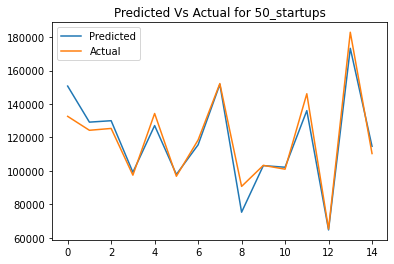

In [288]:
import matplotlib.pyplot as plt

x_range = [i for i in range(len(y_test))]

plt.plot(x_range, y_pred)
plt.plot(x_range, y_test)

plt.legend(['Predicted', 'Actual'])
plt.title('Predicted Vs Actual for 50_startups')


#### Reading the model using sklearn

In [289]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(y_pred, y_test))

0.9248779517625912


In [290]:
print(mean_squared_error(y_pred,y_test))

59378062.8782561


#### Reading the model using statsmodel


In [291]:
X.columns

Index(['State_California', 'State_Florida', 'State_New York', 'R&D_Spend',
       'Administration', 'Marketing_Spend'],
      dtype='object')

In [292]:
" + ".join(X.columns)

'State_California + State_Florida + State_New York + R&D_Spend + Administration + Marketing_Spend'

In [293]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'Profit ~ State_California + State_Florida +  Administration + Marketing_Spend', data = df).fit()

In [294]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.83
Date:                Mon, 15 May 2023   Prob (F-statistic):           7.78e-09
Time:                        14:19:36   Log-Likelihood:                -576.91
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      45   BIC:                             1173.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.291e+04   1.88e+04  

In [213]:
model1 = smf.ols(formula = 'Profit ~ Administration + Marketing_Spend', data = df).fit()

In [214]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.50e-10
Time:                        12:44:05   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04     

**R-squared:** coefficient of determination_goodness of the fit of the model

**Adj R-squared:** most parsimonious model that strikes a balance between goodness of fit and complexity

**F-statistic:** overall regression model is statistically significant and whether the predictors collectively have a significant effect on the dependent variable

**Omnibus:** to the overall test of significance for the regression model.

**Skew:** measure of the asymmetry of a distribution.

**Kurtosis:** shape of a probability distribution

**Durbin-Watson:** detect autocorrelation between the residuals of a regression model

**Jarque-Bera** normal distribution based on its skewness and kurtosis